# Bidirectional LSTM: Time Series

## Problem
* There are two data sets, coming from a ADCP(Acoustic Doppler Current Profiler) device. ADCP devices are fitted with multiple sensors to record the direction, temerature, roll, pitch of under water current. 
* The training data has 11 variables, and 42668 observations.
* The first column or the first variable is the Target and other 10 are features. 
* In the evaluation data set has 7604 observations and same number of variables as the training set, but the first coulmn/variable is measured/recored incorrect.
* The task is to train a model from the first data set so that we can reproduce the incorrect variable (the first coulm in the evaluation set) 

* __The model trained on good dataset(train dataset) will predict the first column of the bad data set (evaluation set)__

* At the end, a statistical test is required to compare if the model has predicted correctly.

## Data Description

### Training Data

*  __Shape of Training Data: (42668, 11)__
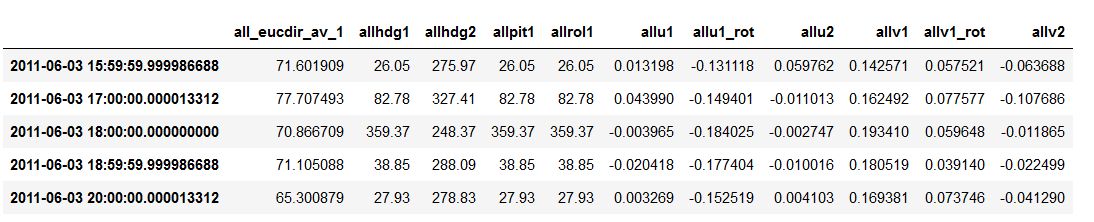

### Evaluation Data
* __Shape of Training Data: (7604, 11)__
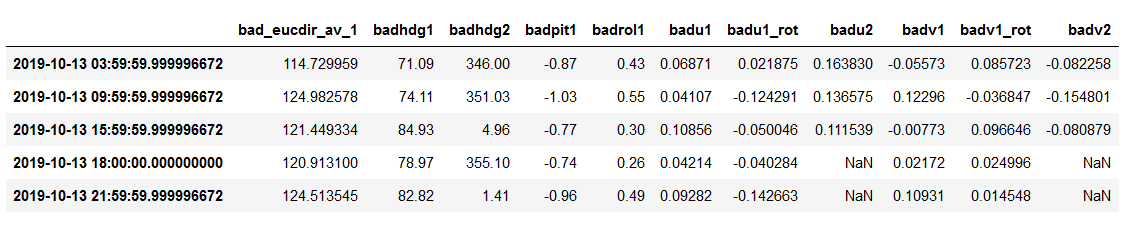

## 

## Load Dependencies

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
from keras.layers import LSTM, Bidirectional, Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
import time

## Load Data

In [33]:
good = pd.read_pickle("good.pkl")
good = good.dropna()
good = good.to_numpy()
good.shape

(18074, 11)

In [34]:
bad = pd.read_pickle("bad.pkl")
bad = bad.dropna()
bad = bad.to_numpy()
bad.shape

(7516, 11)

## Create chunks of dataset for Time Series

In [35]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of obs we want to look into the future based on the past obs.
n_past = 14  # Number of past days we want to use to predict the future.

"""
    Reformat input data into a shape: (n_samples x timesteps x n_features)
    In my example, my df_for_training_scaled has a shape (18074, 11)
    18060 refers to the number of data points and 11 refers to the columns (multi-variables).

"""
for i in range(n_past, len(good) - n_future +1):   
    trainX.append(good[i - n_past:i, 1:good.shape[1]])
    trainY.append(good[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)


print(f'trainX Shape: {trainX.shape}')
print(f'trainY Shape: {trainY.shape}')

trainX Shape: (18060, 14, 10)
trainY Shape: (18060, 1)


In [36]:
#Empty lists to be populated using formatted evaluation set
evalX = []
evalY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


for i in range(n_past, len(bad) - n_future +1):   
    evalX.append(bad[i - n_past:i, 1:bad.shape[1]])
    evalY.append(bad[i + n_future - 1:i + n_future, 0])

evalX, evalY = np.array(evalX), np.array(evalY)


print(f'evalX Shape: {evalX.shape}')
print(f'evalY Shape: {evalY.shape}')

evalX Shape: (7502, 14, 10)
evalY Shape: (7502, 1)


## Declare epochs

In [14]:
epoch = 20

## Create Checkpoint/director

In [43]:
import os
checkpoint_path = "./Bi-Direc-LSTM-2-epoch-20/adam/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_dir)

./Bi-Direc-LSTM-2-epoch-20/adam


In [38]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,
   # Save weights, every epoch.
   save_freq='epoch')

## Create model

In [39]:


n_steps = trainX.shape[-2]
n_features = trainX.shape[-1]# Define the model

def create_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(64, activation='sigmoid', input_shape=(n_steps, n_features))))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))# Compile the model
    model.compile(optimizer='adam', loss='mse')
    return model
          




## Fit Model with History Object

In [44]:
tic = time.time()

model = create_model()

H = model.fit(trainX, trainY,
              batch_size = 64, callbacks = [cp_callback],
              epochs = epoch, verbose=1)

toc = time.time()

Epoch 1/20
283/283 [==============================] - 12s 11ms/step - loss: 3683.7024

Epoch 00001: saving model to ./Bi-Direc-LSTM-2-epoch-20/adam\cp-0020.ckpt
Epoch 2/20
283/283 [==============================] - 3s 11ms/step - loss: 140.4707

Epoch 00002: saving model to ./Bi-Direc-LSTM-2-epoch-20/adam\cp-0020.ckpt
Epoch 3/20
283/283 [==============================] - 3s 12ms/step - loss: 140.8202

Epoch 00003: saving model to ./Bi-Direc-LSTM-2-epoch-20/adam\cp-0020.ckpt
Epoch 4/20
283/283 [==============================] - 3s 11ms/step - loss: 140.2638

Epoch 00004: saving model to ./Bi-Direc-LSTM-2-epoch-20/adam\cp-0020.ckpt
Epoch 5/20
283/283 [==============================] - 3s 11ms/step - loss: 137.5689

Epoch 00005: saving model to ./Bi-Direc-LSTM-2-epoch-20/adam\cp-0020.ckpt
Epoch 6/20
283/283 [==============================] - 3s 11ms/step - loss: 136.8163

Epoch 00006: saving model to ./Bi-Direc-LSTM-2-epoch-20/adam\cp-0020.ckpt
Epoch 7/20
283/283 [========================

## Time Elapsed

In [45]:
import datetime
Time_Elapsed = toc-tic

Time_Elapsed = str(datetime.timedelta(seconds=Time_Elapsed))
print(f'Time Elapsed: {Time_Elapsed} seconds')

Time Elapsed: 0:01:14.501632 seconds


## Save Model

In [42]:
checkpoint_dir

'./Bi-Direc-LSTM-2-epoch-20/adam'

## Save history

In [46]:
saving_path = f'./Bi-Direc-LSTM-2-epoch-20'
saving_path

'./Bi-Direc-LSTM-2-epoch-20'

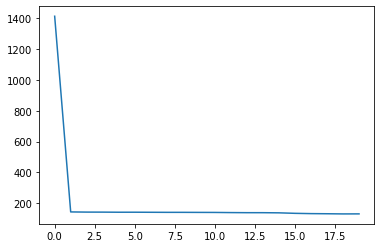

In [47]:


# Save history
import numpy as np
hist_df = pd.DataFrame(H.history)

# Save history in the ame directory as model
hist_path = f"{saving_path}-history.pkl"
hist_df.to_pickle(hist_path)
hist = pd.read_pickle(hist_path)
hist.tail()
plt.plot(hist)

## Predict from the model

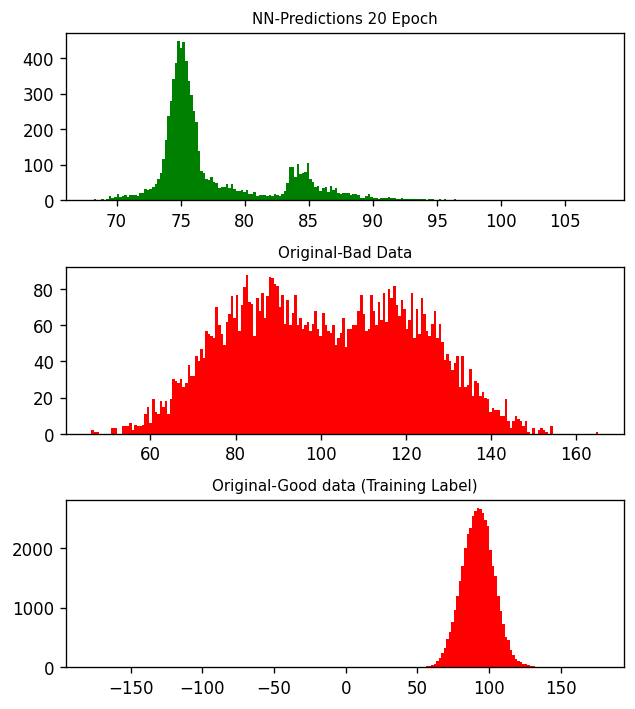

In [50]:
predict = model.predict(evalX)
good = df[:,0]

plt.rcParams['figure.figsize'] = 6,7
plt.rcParams['figure.dpi'] = 120
fig, ax = plt.subplots(3,1)
ax[0].hist(predict, bins = 200, color = "green", lw=0);
ax[0].set_title(f"NN-Predictions {epoch} Epoch", fontsize = 9)
ax[1].hist(evalY, bins = 200, color = "red", lw=0)
ax[1].set_title("Original-Bad Data", fontsize = 9);

ax[2].hist(good, bins = 200, color = "red", lw=0)
ax[2].set_title("Original-Good data (Training Label)", fontsize = 9);
fig.subplots_adjust(hspace=0.4)
plt.show();

## Plot prdicted, eval, and the original good

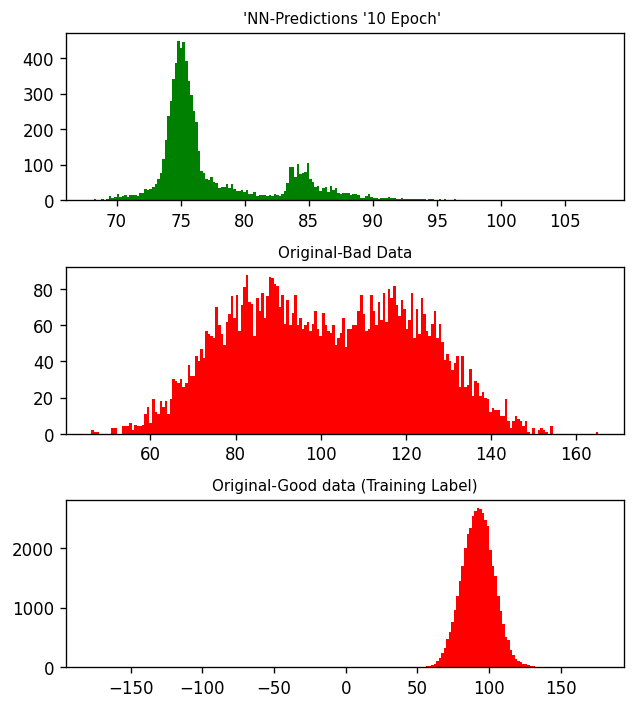

In [53]:
## Load model from 10 epochs
latest = f'{checkpoint_dir}\\cp-0020.ckpt'
latest
import tensorflow as tf
from tensorflow import keras

model_10_epoch = create_model()
model_10_epoch.load_weights(latest)
predict_10_epoch = model_10_epoch.predict(evalX)
good = df[:,0]

plt.rcParams['figure.figsize'] = 6,7
plt.rcParams['figure.dpi'] = 120
fig, ax = plt.subplots(3,1)
ax[0].hist(predict_10_epoch, bins = 200, color = "green", lw=0);
ax[0].set_title("'NN-Predictions '10 Epoch' ", fontsize = 9)
ax[1].hist(evalY, bins = 200, color = "red", lw=0)
ax[1].set_title("Original-Bad Data", fontsize = 9);

ax[2].hist(good, bins = 200, color = "red", lw=0)
ax[2].set_title("Original-Good data (Training Label)", fontsize = 9);
fig.subplots_adjust(hspace=0.4)
plt.show();

## Create a loop for load and predict the models from each epoch, plot in for loop to a folder

## Checking Distribution of the predicted data

## Welch ttest 
* Welch ttest is an alternative of standard ttest when the samples are not the same size
* Welch ttest is used to check if both of the samples are coming from a same population
* The Null hypothesis is that, H0: both are same

In [76]:
from scipy import stats
def welch_ttest(x, y):  
    t, p = stats.ttest_ind(x, y, equal_var = True)
    print(f't value: {t}')
    print(f'p-value: {p}')
    if p>=.1:
        print('The sample are Same')
    """
    
    The Null hypothesis is that the both samples
    are drawn from same population.
    
    
    """
x = good[1:1000]
y = good[1001:2000]
x = np.random.normal(2, 1, 1000)
y = np.random.normal(2, 1, 10000)
x = pd.read_pickle('good.pkl').dropna().iloc[:,0].tolist()
y = predict.tolist()

# y = pd.Series(y)

import numpy as np
# x = np.random.normal(2, 1, 1000)
# y = np.random.normal(2, 1, 10000)

welch_ttest(x,y)





t value: [99.24678639]
p-value: [0.]


## Result Interpretation:
* p-value is 0.0, looks like the model predicted well
* But from the plots above it looks like that the predicted is a bimodal distribution
* So, p-value can not determine the good ness of the prediction

## Improvements

* Need through check of the variables
* Maybe, a Box-Jenkins methods, ARIMA or ARIMAX might be tried
* Exponential Smooting techniques could be tried
* Hyper parameter tune could be useful

